# Keypoints extraction algorithms

<p>This notebook demostrates several keypoint extraction algorithms

<small>Author: Fernando Carlos López Hernández</small>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread('images/chessboard.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

First we compute the Harris corners and draw the harris corner keypoints in the image

In [2]:
# Compute the Harris corner detector response
window_size = 3
sobel_aperture_size = 3
k = 0.1
response = cv2.cornerHarris(im_gray, window_size, sobel_aperture_size, k)
# Non-maximal suppresion
response = cv2.dilate(response, None)
threshold = 0.1
response[response<threshold*response.max()] = 0.0
# Convert coordinates to Keypoint type
indices = np.where(response>=threshold*response.max())
harris_keypoints = [cv2.KeyPoint(float(p[1]), float(p[0]), response[p[0],p[1]]) for p in zip(*indices)]
# Draw the harris corner keypoints in the image
im_harris = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(im_harris, harris_keypoints, im_harris, [255,0,0]);

error: OpenCV(3.4.16) /opt/local/var/macports/build/_opt_local_var_macports_sources_rsync.macports.org_macports_release_tarballs_ports_graphics_opencv3/opencv3/work/opencv3-3.4.16/modules/imgproc/src/color.simd_helpers.hpp:88: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


We also compute FAST/SIFT/BRIEF/ORB descriptors and draw the keypoints in the correspondng images

In [ ]:
# Compute FAST descriptors
threshold = 50
fast = cv2.FastFeatureDetector_create(threshold) 
fast_keypoints = fast.detect(im_gray, mask = None)
# Draw FAST keypoints in the image
im_fast = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(im_fast, fast_keypoints, im_fast, [255,0,0])

# Compute SIFT descriptors
n_features = 40
sift = cv2.SIFT_create(n_features)
sift_keypoints, sift_descriptors = sift.detectAndCompute(im_gray, None)
# Draw SIFT keypoints in the image
im_sift = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(im_sift, sift_keypoints, im_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Compute BRIEF descriptors
bytes = 32
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes)
brief_keypoints, brief_descriptors = brief.compute(im_gray, fast_keypoints)
# Draw BRIEF keypoints in the image
im_brief = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(im_brief, brief_keypoints, im_brief, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Compute ORB descriptors
orb = cv2.ORB_create(n_features)
orb_keypoints, orb_descriptor = orb.detectAndCompute(im_gray, None)
# Draw ORB keypoints in the image
im_orb = cv2.cvtColor(im_gray, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(im_orb, orb_keypoints, im_orb, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS);

Finally, we show the results

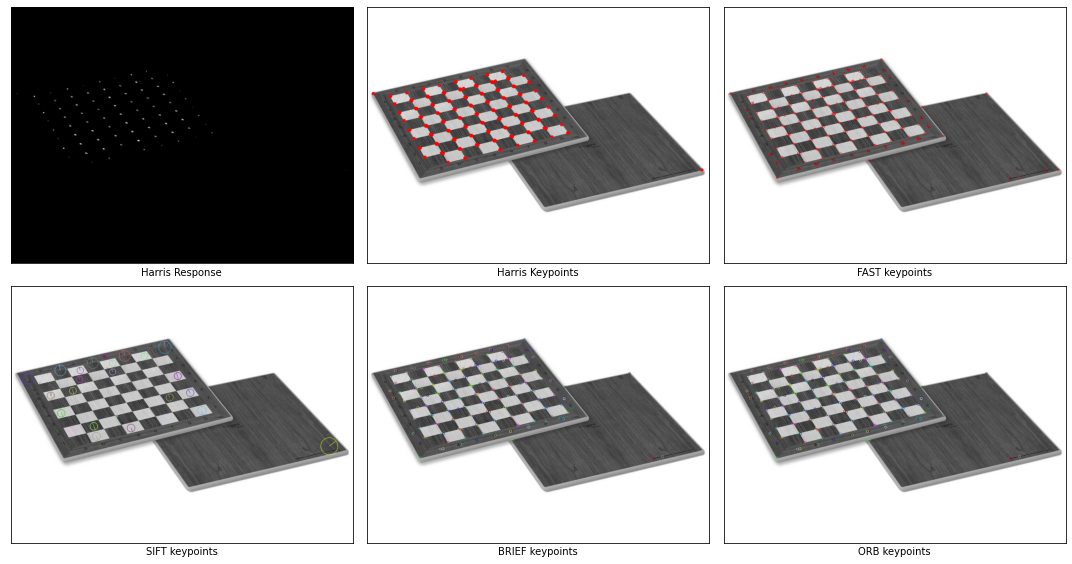

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes[0,0].imshow(response, cmap = 'gray'); axes[0,0].set_xlabel('Harris Response')
axes[0,1].imshow(im_harris); axes[0,1].set_xlabel('Harris Keypoints')
axes[0,2].imshow(im_fast); axes[0,2].set_xlabel('FAST keypoints')
axes[1,0].imshow(im_sift); axes[1,0].set_xlabel('SIFT keypoints')
axes[1,1].imshow(im_brief); axes[1,1].set_xlabel('BRIEF keypoints')
axes[1,2].imshow(im_brief); axes[1,2].set_xlabel('ORB keypoints')
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()